1. date: Date in format dd/mm/yyyy
2. time: time in format hh:mm:ss
3. global_active_power: househo ld global minuteaveraged active power (in kilowatt)
4. global_reactive_power: household global minuteaveraged reactive power (in kilow att)
5. voltage: minute averaged voltage (in volt)
6. global_intensity: household global minuteaveraged current intensity (in ampere)
7. sub_metering_1: energy submetering No. 1 (in watthour of active energy). It cor responds to the kitchen, containingmainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
8. sub_metering_2: energy submetering No. 2 (in watthour of active energy). It corresponds to the laundry room, containing a washingmachine, a tumbledrier, a refrigerator and a light.
9. sub_metering_3: energy submetering No. 3 (in watthour of active ene rgy). It corresponds to an electric waterheater and an airconditioner.


This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between
December 2006 and November 2010 (47 months).
Notes:
1. (global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in submeterings 1, 2 and 3.

2. The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps
are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented
by the absence of value between two consecutive semicolon attribute separators. For instance, the dataset shows missing values on April 28, 2007

### Before plotting 
* We will only be using data from the dates 2007-02-01 and
2007-02-02. One alternative is to read the data from just those dates
rather than reading in the entire dataset and subsetting to those
dates.

* Note that in this dataset missing values are coded as `?`.

In [17]:
library(ggplot2)
library(tidyverse)
library(readr)
library(tidyverse)
library(dplyr)


In [3]:
df <- read.table('household_power_consumption.txt', header = TRUE, sep = ";")
df$Date <- as.Date(df$Date, format = "%d/%m/%Y")
df2 <- df[which(df$Date == '2007-02-01' | df$Date == '2007-02-02'),]
rownames(df2) <- c() ## to get rid of the index of the data frame
for (i in names(df2)[3:9]){
    df2[, i] <- as.numeric(as.character(df2[, i]))
}
df2$DateTimeCol <- paste(df2$Date, df2$Time, sep = " ")
df2$DateTimeCol <- strptime(df2$DateTimeCol, "%Y-%m-%d %H:%M:%S")
head(df2)

Warning message in strptime(x, format, tz = "GMT"):
“unknown timezone 'default/America/Chicago'”

Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTimeCol
2007-02-01,00:00:00,0.326,0.128,243.15,1.4,0,0,0,2007-02-01 00:00:00
2007-02-01,00:01:00,0.326,0.130,243.32,1.4,0,0,0,2007-02-01 00:01:00
2007-02-01,00:02:00,0.324,0.132,243.51,1.4,0,0,0,2007-02-01 00:02:00
2007-02-01,00:03:00,0.324,0.134,243.90,1.4,0,0,0,2007-02-01 00:03:00
2007-02-01,00:04:00,0.322,0.130,243.16,1.4,0,0,0,2007-02-01 00:04:00
2007-02-01,00:05:00,0.320,0.126,242.29,1.4,0,0,0,2007-02-01 00:05:00


## Plot 1, Plot ranges of glabel active power value in histogram 

In [201]:
png("plot1.png", width=480, height=480)
p1 <- ggplot(df2, aes(Global_active_power))
plot1 <- p1 + geom_histogram(binwidth= 0.5, fill = "red", col = "black") +
theme_minimal() +
labs(x = "Global Active Power (kilowatts)") +
labs(y = "Frequency") +
ggtitle("Global Active Power")+ 
theme(plot.title = element_text(hjust= 0.5)) +
xlim(0, 6)
# coord_cartesian(xlim = c(-0.2, 6.4))
print(plot1)
dev.off()

Warning message:
“Removed 2 rows containing non-finite values (stat_bin).”

pdf 
  2

Warning message:
“Removed 2 rows containing non-finite values (stat_bin).”

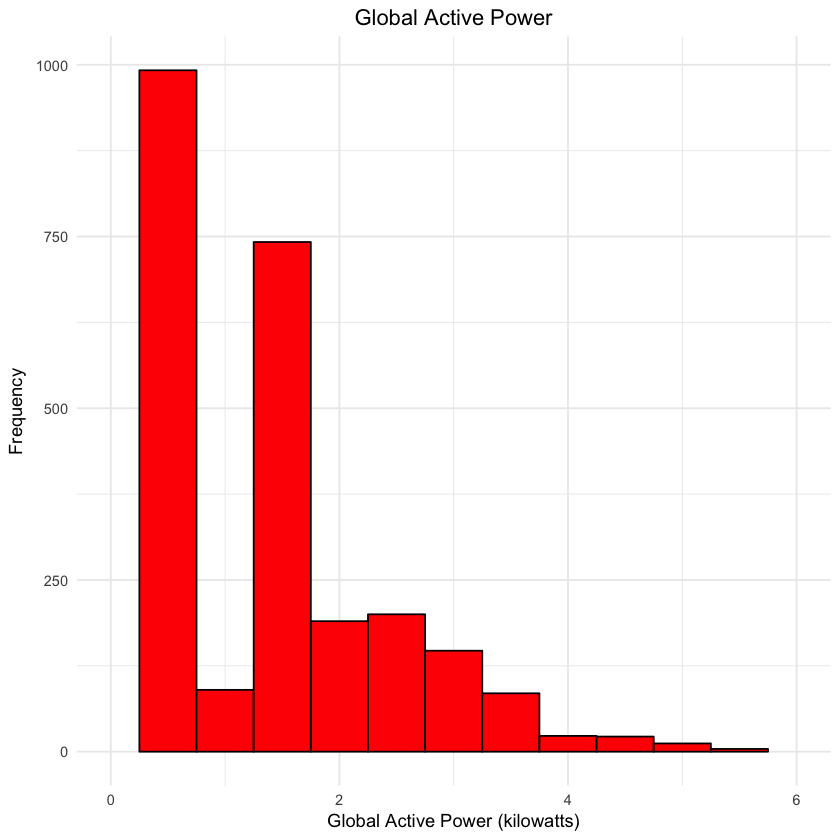

In [138]:
print(plot1)


## Plot 2, Changes of Global Active Power from 2007-02-01 to 2007-02-02

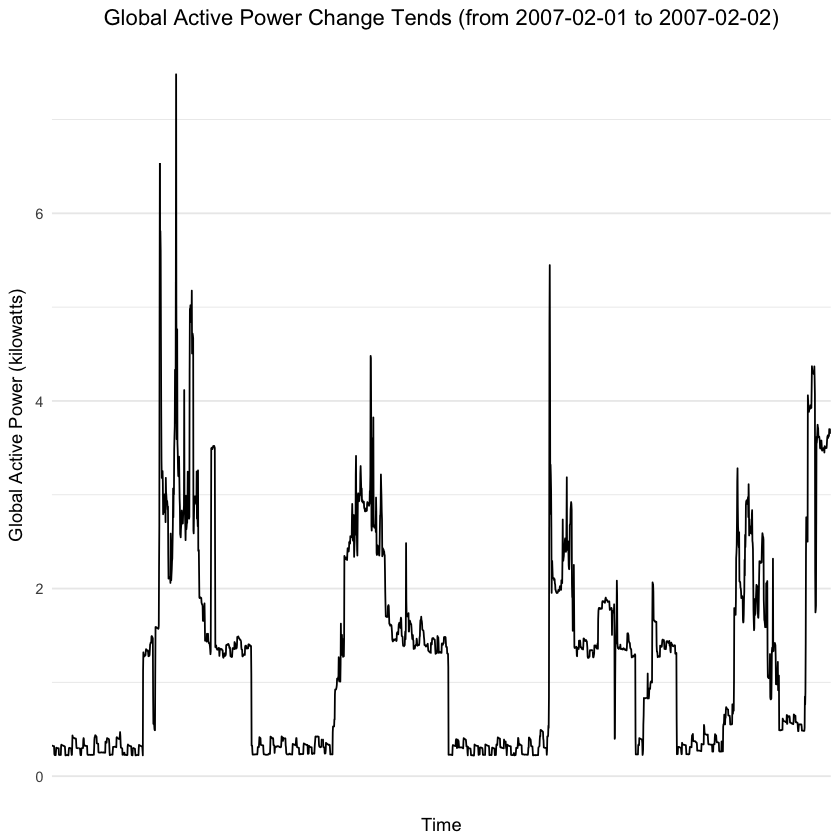

In [259]:
p2 <- ggplot(df2, aes(DateTimeCol, Global_active_power))
p2 + geom_line() + 
theme_minimal() +
labs(x = "Time") +
labs(y = "Global Active Power (kilowatts)") +
ggtitle("Global Active Power Change Tends (from 2007-02-01 to 2007-02-02)")+
theme(plot.title = element_text(hjust= 0.5)) +
scale_x_discrete(limits= c("Thursday", "Laifu", "Friday", "Jiao", "Saturday") )
# scale_x_discrete(breaks=c("2007-02-01 00:00:00","2007-02-01 12:00:00",
#                           "2007-02-02 00:00:00", "2007-02-02 12:00:00", 
#                            '2007-02-03 00:00:00'),
#         labels=c("2007-02-01 00:00:00"="Thursday", "2007-02-01 12:00:00" = "1", 
#                  "2007-02-02 00:00:00" = "Friday", "2007-02-02 12:00:00" = "2", '2007-02-03 00:00:00'= "Saturday"))


#scale_x_date(date_break = "weeks", date_labels = "%B")+

# scale_x_discrete(breaks=c("2007-02-01 00:00:00","2007-02-01 12:00:00",
#                           "2007-02-02 00:00:00", "2007-02-02 12:00:00", 
#                            '2007-02-03 00:00:00'),
#         labels=c("Thursday", "1", "Friday", "2",  "Saturday"))

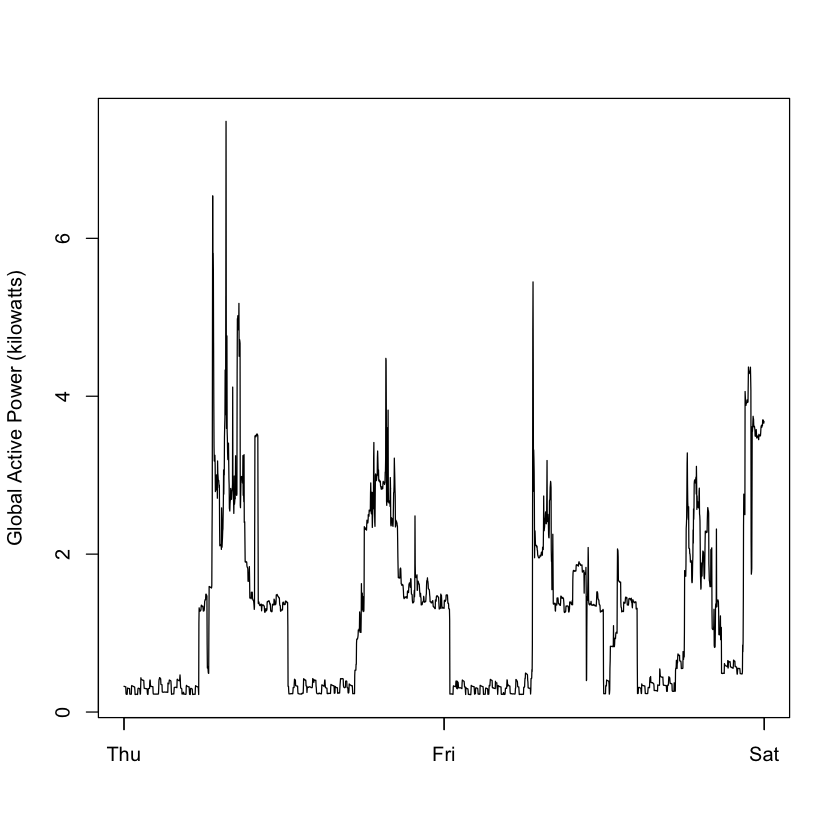

In [260]:
plot(df2$DateTimeCol, df2$Global_active_power, type="l", xlab="", ylab="Global Active Power (kilowatts)")

In [200]:
png("plot2.png", width=480, height=480)
plot(df2$DateTimeCol, df2$Global_active_power, type="l", xlab="", ylab="Global Active Power (kilowatts)")
dev.off()

pdf 
  2

## Plot3, compare three sub_metering trends from from 2007-02-01 to 2007-02-02



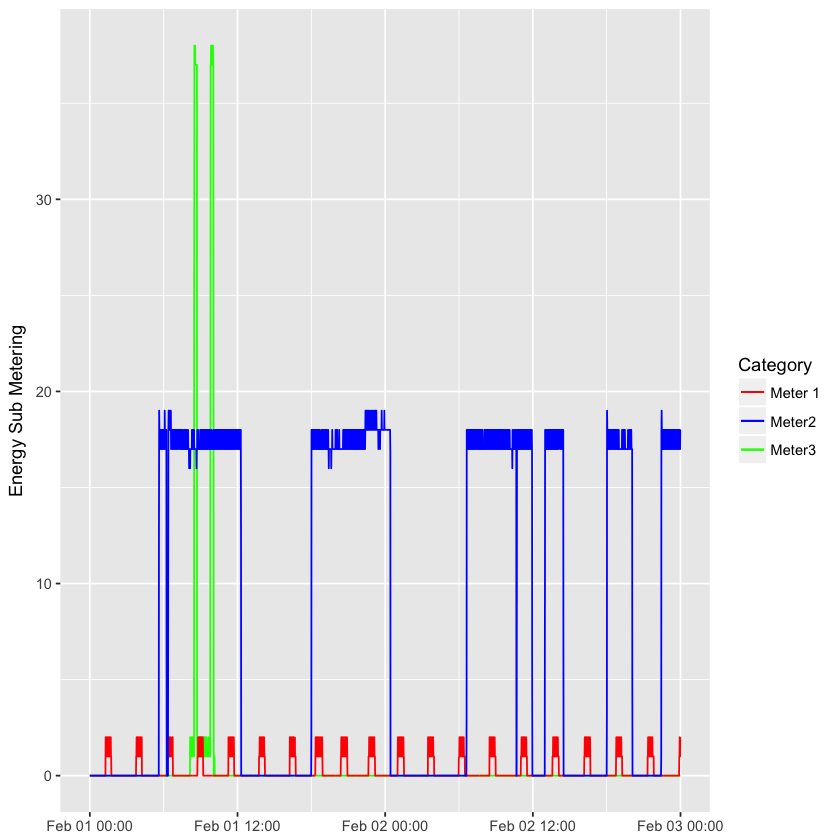

In [236]:
p2 <- ggplot()+
    geom_line(data= df2, aes(x = DateTimeCol, y = Sub_metering_1, color = "red" )) +
    geom_line(data= df2, aes(x = DateTimeCol, y = Sub_metering_2 , color = "blue")) +
    geom_line(data= df2, aes(x = DateTimeCol, y = Sub_metering_3 , color = "green" )) +
    labs(y = "Energy Sub Metering") +
    theme(axis.title.x=element_blank())+
    scale_color_manual(labels = c("Meter 1", "Meter2", "Meter3"), values = c("red", "blue", "green")) +
    guides(color=guide_legend("Category"))
    

p2

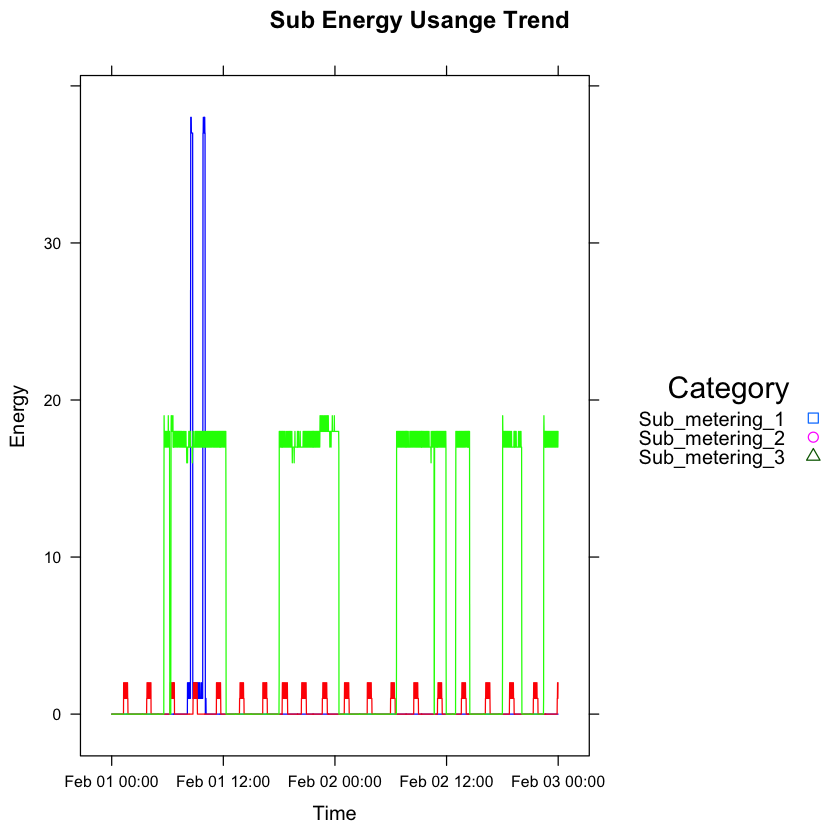

In [293]:
library(lattice)

xyplot( Sub_metering_1 + Sub_metering_2 + Sub_metering_3 ~ DateTimeCol , data=df2, type = c('l','l', 'l'),
       col = c("blue", "red", "green"), auto.key=list(title="Category", space = "right", cex=1.0),
         par.settings = list(superpose.symbol=list(pch = 0:18, cex=1)),main = "Sub Energy Usange Trend", 
       xlab = "Time", ylab = "Energy")



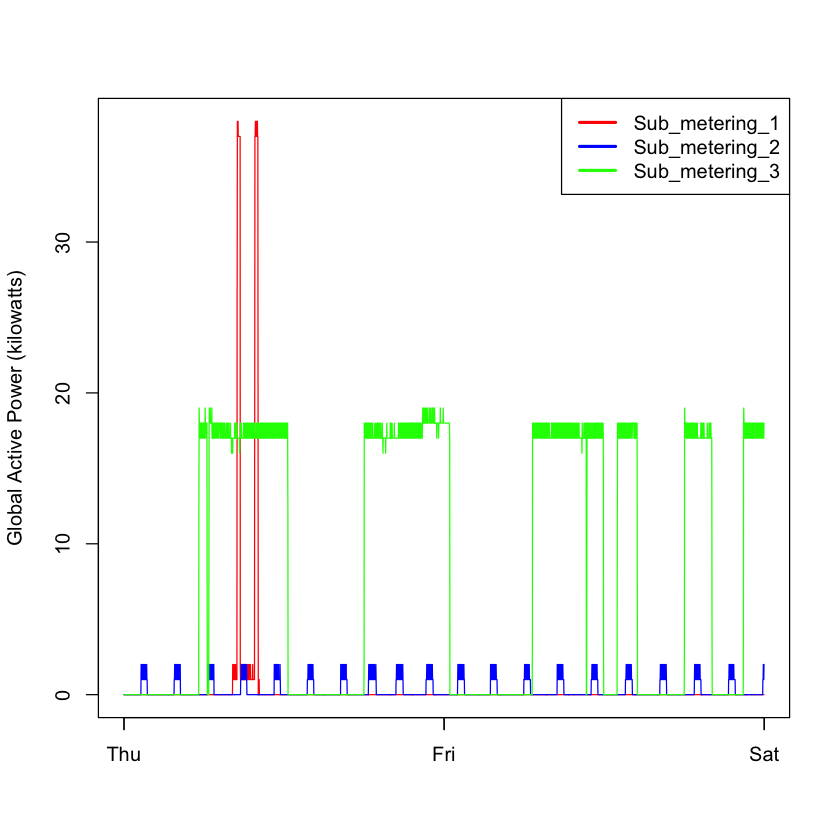

In [304]:
plot(df2$DateTimeCol, df2$Sub_metering_1, type="l", xlab="", ylab="Global Active Power (kilowatts)", col = "red")
lines(df2$DateTimeCol, df2$Sub_metering_2 , col = "blue")
lines(df2$DateTimeCol, df2$Sub_metering_3, , col = "green")
legend("topright", c("Sub_metering_1", "Sub_metering_2", "Sub_metering_3"), lty=1, lwd=2.5, col=c("red", "blue", "green"))

In [16]:
png("plot3.png", width=480, height=480)
plot(df2$DateTimeCol, df2$Sub_metering_1, type="l", xlab="", ylab="Global Active Power (kilowatts)", col = "red")
lines(df2$DateTimeCol, df2$Sub_metering_2 , col = "blue")
lines(df2$DateTimeCol, df2$Sub_metering_3, , col = "green")
legend("topright", c("Sub_metering_1", "Sub_metering_2", "Sub_metering_3"), lty=1, lwd=2.5, col=c("red", "blue", "green"))
dev.off()

pdf 
  2

## Plot 4, 

In [15]:
png("plot4.png", width=480, height=480)
par(mfrow = c(2,2), mar = c(4,4,4,0.75))
plot(df2$DateTimeCol, df2$Global_active_power, type="l", xlab="", ylab="Global Active Power (kilowatts)")
plot(df2$DateTimeCol, df2$Voltage, type="l", xlab="", ylab="Voltage")
plot(df2$DateTimeCol, df2$Sub_metering_1, type="l", xlab="", ylab="Global Active Power (kilowatts)", col = "red")
lines(df2$DateTimeCol, df2$Sub_metering_2 , col = "blue")
lines(df2$DateTimeCol, df2$Sub_metering_3, , col = "green")
plot(df2$DateTimeCol, df2$Global_reactive_power, type="l", xlab="", ylab="Global Reactive Power (kilowatts)")
dev.off()

pdf 
  2

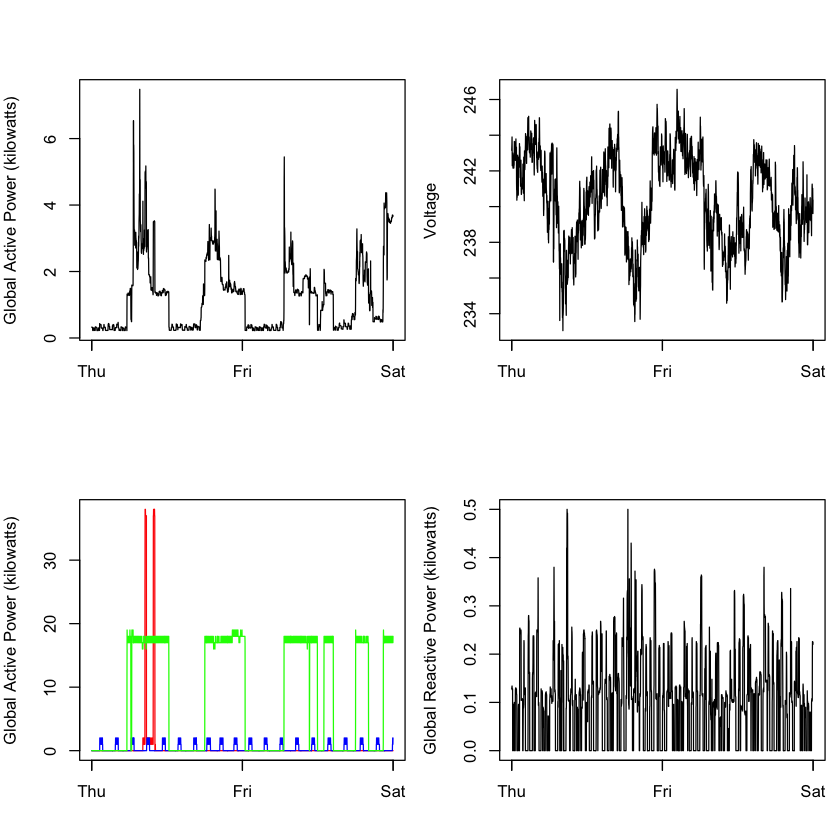

In [13]:
par(mfrow = c(2,2), mar = c(4,4,4,0.75))
plot(df2$DateTimeCol, df2$Global_active_power, type="l", xlab="", ylab="Global Active Power (kilowatts)")
plot(df2$DateTimeCol, df2$Voltage, type="l", xlab="", ylab="Voltage")
plot(df2$DateTimeCol, df2$Sub_metering_1, type="l", xlab="", ylab="Global Active Power (kilowatts)", col = "red")
lines(df2$DateTimeCol, df2$Sub_metering_2 , col = "blue")
lines(df2$DateTimeCol, df2$Sub_metering_3, , col = "green")
plot(df2$DateTimeCol, df2$Global_reactive_power, type="l", xlab="", ylab="Global Reactive Power (kilowatts)")

## ggplot2 way to put 4 graph togather into a dashboard

`geom_smooth()` using method = 'gam'


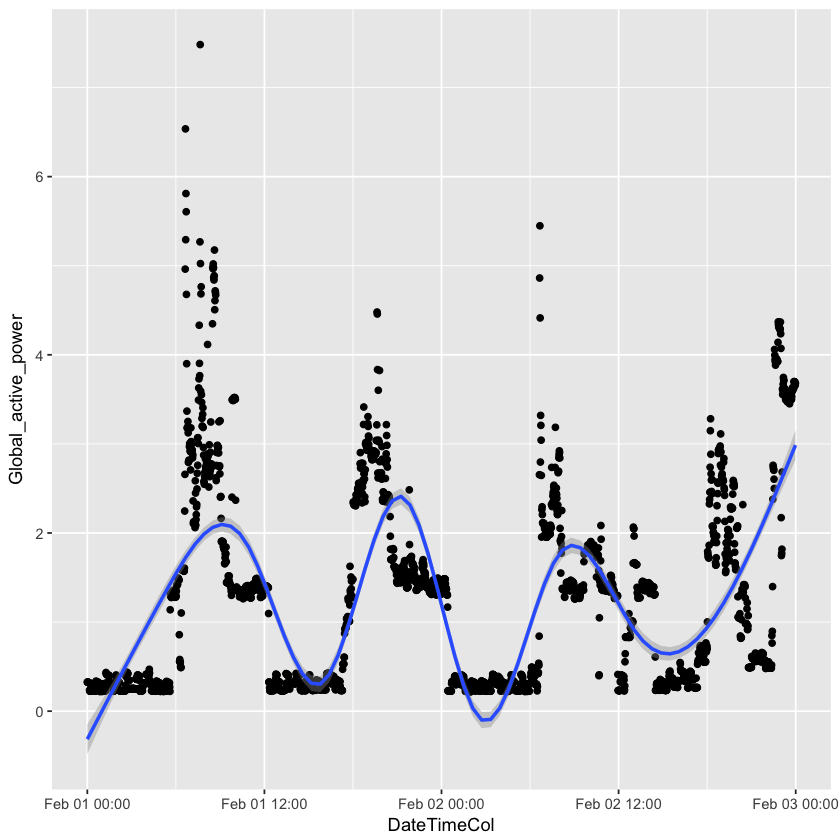

In [19]:
p1 <- qplot(DateTimeCol, Global_active_power, data = df2, geom = c("point", "smooth"))
p1

`geom_smooth()` using method = 'gam'


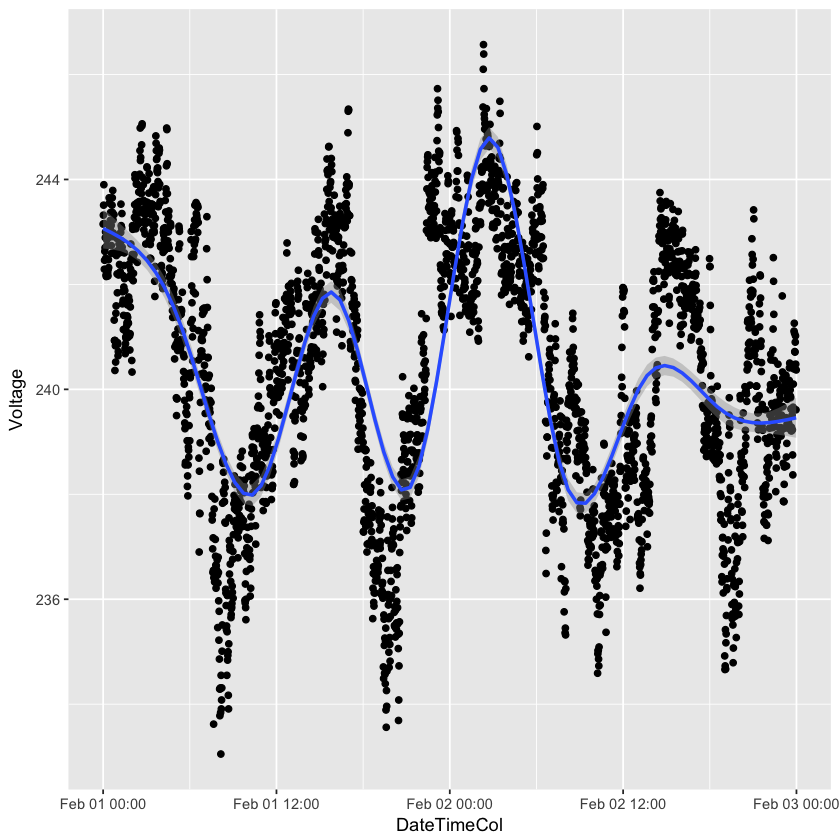

In [21]:
p2 <- qplot(DateTimeCol , Voltage, data = df2,  geom = c("point", "smooth"))
p2

`geom_smooth()` using method = 'gam'


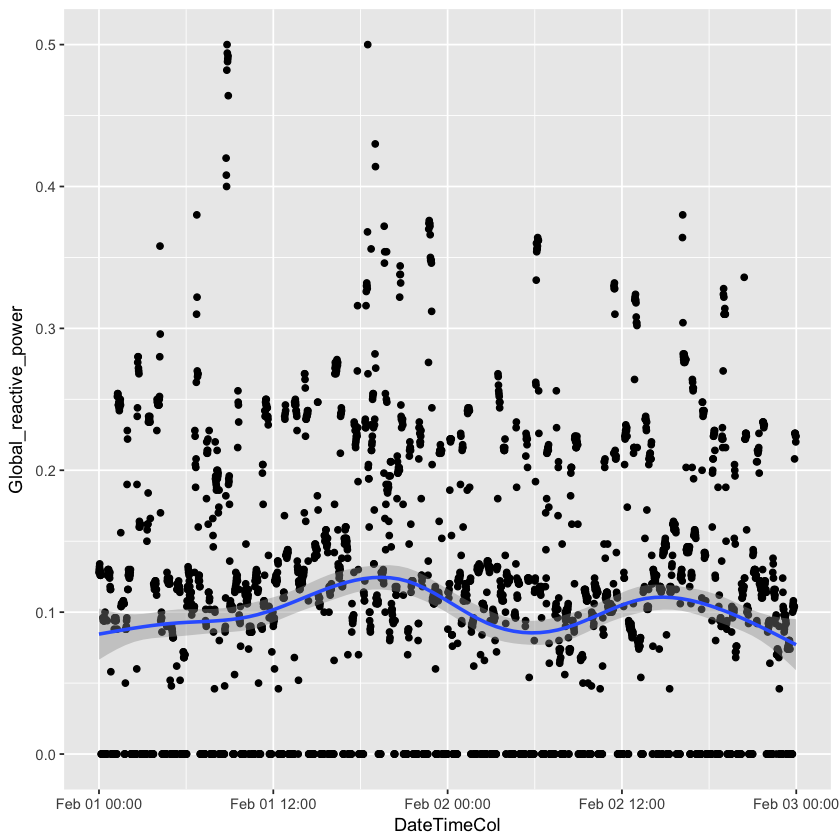

In [22]:
p4 <- qplot(DateTimeCol , Global_reactive_power, data = df2, geom = c("point", "smooth"))
p4

In [26]:
install.packages('gridExtra')

Installing package into ‘/Users/apple/Library/R/3.4/library’
(as ‘lib’ is unspecified)



The downloaded binary packages are in
	/var/folders/ww/6glkvg4s3hgd9p09584nhtqw0000gn/T//RtmpzO0Peg/downloaded_packages


`geom_smooth()` using method = 'gam'
`geom_smooth()` using method = 'gam'
`geom_smooth()` using method = 'gam'


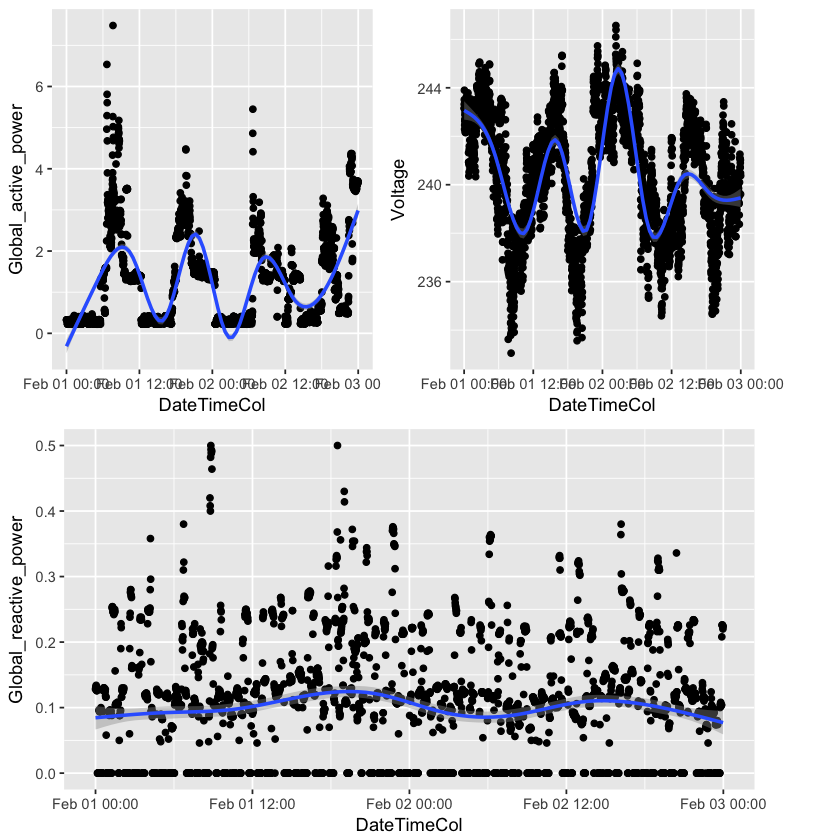

In [41]:
library(gridExtra)
grid.arrange(p1, p2, p4, widths = c(5, 5, 1),
layout_matrix = rbind(c(1, 2, NA),
c(3, 3, 4)))